# Linear Regression

Let us try Linear Regression on our Bakery Sales data

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

# Global plot settings
plt.rcParams['figure.dpi'] = 150   # Set the resolution of the plots to 150 DPI
plt.style.use('fivethirtyeight')

Read the data

In [4]:
df_sales = pd.read_csv("/workspaces/bakery_prediction/2_BaselineModel/split_rollingaverage_data/train_data.csv", encoding = "utf-8")

In [23]:
#check na values
print(df_sales.isnull().sum())

id                     0
Datum                  0
Umsatz                 0
KielerWoche            0
Umsatz_roll            0
Bewoelkung             0
Temp_roll              0
Temperatur             0
Wind_roll              0
Windgeschwindigkeit    0
Woche                  0
Feiertag               0
Jahreszeit             0
Ferien                 0
sunny                  0
cloudy                 0
rainy                  0
thunderstorm           0
Monday                 0
Tuesday                0
Wednesday              0
Thursday               0
Friday                 0
Saturday               0
Sunday                 0
January                0
February               0
March                  0
April                  0
May                    0
June                   0
July                   0
August                 0
September              0
October                0
November               0
December               0
Winter                 0
Spring                 0
Summer                 0


In [5]:
df_sales.head()

,id,Datum,Umsatz,KielerWoche,Umsatz_roll,Bewoelkung,Temp_roll,Temperatur,Wind_roll,Windgeschwindigkeit,...,Group_1,Group_2,Group_3,Group_4,Group_5,Group_6,Temp_Winter,Temp_Spring,Temp_Summer,Temp_Autumn
0,1307011,2013-07-01,148.828353,0,148.828353,6,17.8375,17.8375,15.0,15,...,1,0,0,0,0,0,0.0,0.0,17.8375,0.0
1,1307012,2013-07-01,535.856285,0,342.342319,6,17.8375,17.8375,15.0,15,...,0,1,0,0,0,0,0.0,0.0,17.8375,0.0
2,1307013,2013-07-01,201.198426,0,295.294355,6,17.8375,17.8375,15.0,15,...,0,0,1,0,0,0,0.0,0.0,17.8375,0.0
3,1307014,2013-07-01,65.890169,0,237.943308,6,17.8375,17.8375,15.0,15,...,0,0,0,1,0,0,0.0,0.0,17.8375,0.0
4,1307015,2013-07-01,317.475875,0,253.849821,6,17.8375,17.8375,15.0,15,...,0,0,0,0,1,0,0.0,0.0,17.8375,0.0


In [6]:
df_sales.describe()

,id,Umsatz,KielerWoche,Umsatz_roll,Bewoelkung,Temp_roll,Temperatur,Wind_roll,Windgeschwindigkeit,Woche,...,Group_1,Group_2,Group_3,Group_4,Group_5,Group_6,Temp_Winter,Temp_Spring,Temp_Summer,Temp_Autumn
count,7.493000e+03,7493.000000,7493.000000,7493.000000,7493.000000,7493.000000,7493.000000,7493.000000,7493.000000,7493.000000,...,7493.000000,7493.000000,7493.000000,7493.000000,7493.000000,7493.000000,7493.000000,7493.000000,7493.000000,7493.000000
mean,1.509190e+06,209.338996,0.023756,209.293862,4.764447,12.071023,12.077576,11.031491,11.028693,27.146670,...,0.195115,0.195115,0.195115,0.188042,0.195115,0.031496,1.051075,2.683184,5.169077,3.174239
std,1.233919e+05,147.769192,0.152297,50.362564,2.611917,6.687173,7.024661,2.413188,4.156233,15.105448,...,0.396316,0.396316,0.396316,0.390772,0.396316,0.174666,2.617665,5.317415,8.893350,5.992414
min,1.307011e+06,12.937383,0.000000,114.637973,0.000000,-4.604167,-8.475000,4.933333,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.475000,0.000000,0.000000,0.000000
25%,1.407094e+06,96.774910,0.000000,170.736923,3.000000,6.687500,6.625000,9.400000,8.000000,14.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.507172e+06,162.622977,0.000000,201.862553,6.000000,11.681667,11.500000,10.800000,10.000000,28.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.607233e+06,283.910218,0.000000,237.452881,7.000000,17.958333,17.837500,12.366667,13.000000,40.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.362500,2.875000
max,1.707315e+06,1879.461831,1.000000,395.965626,8.000000,25.645833,31.437500,21.666667,35.000000,53.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.500000,26.862500,31.437500,27.875000


See the data types 

In [7]:
# change dattum format to datetime
df_sales['Datum'] = pd.to_datetime(df_sales['Datum'], format='%Y-%m-%d')

In [8]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7493 entries, 0 to 7492
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   7493 non-null   int64         
 1   Datum                7493 non-null   datetime64[ns]
 2   Umsatz               7493 non-null   float64       
 3   KielerWoche          7493 non-null   int64         
 4   Umsatz_roll          7493 non-null   float64       
 5   Bewoelkung           7493 non-null   int64         
 6   Temp_roll            7493 non-null   float64       
 7   Temperatur           7493 non-null   float64       
 8   Wind_roll            7493 non-null   float64       
 9   Windgeschwindigkeit  7493 non-null   int64         
 10  Woche                7493 non-null   int64         
 11  Feiertag             7493 non-null   int64         
 12  Jahreszeit           7493 non-null   int64         
 13  Ferien               7493 non-nul

Let us select the numerical features 

In [9]:
df_sales.columns.tolist()

['id',
 'Datum',
 'Umsatz',
 'KielerWoche',
 'Umsatz_roll',
 'Bewoelkung',
 'Temp_roll',
 'Temperatur',
 'Wind_roll',
 'Windgeschwindigkeit',
 'Woche',
 'Feiertag',
 'Jahreszeit',
 'Ferien',
 'sunny',
 'cloudy',
 'rainy',
 'thunderstorm',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Thursday',
 'Friday',
 'Saturday',
 'Sunday',
 'January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December',
 'Winter',
 'Spring',
 'Summer',
 'Autumn',
 'Group_1',
 'Group_2',
 'Group_3',
 'Group_4',
 'Group_5',
 'Group_6',
 'Temp_Winter',
 'Temp_Spring',
 'Temp_Summer',
 'Temp_Autumn']

In [10]:
# The filtered data with only numerical features
df_num_feature = df_sales.select_dtypes(include=[np.number])

Visulaizing pairplot is time consuming so commented

In [11]:
#plt.figure(figsize=(8,8))

#sns.pairplot(df_num_feature)

#plt.show()

Viewing the correlation

In [12]:
df_num_feature.corr()

,id,Umsatz,KielerWoche,Umsatz_roll,Bewoelkung,Temp_roll,Temperatur,Wind_roll,Windgeschwindigkeit,Woche,...,Group_1,Group_2,Group_3,Group_4,Group_5,Group_6,Temp_Winter,Temp_Spring,Temp_Summer,Temp_Autumn
id,1.000000,-0.097412,0.059476,-0.278619,0.041661,-0.114388,-0.096006,0.043378,0.026897,-0.314629,...,0.004454,0.004458,0.004462,0.018717,0.004470,-0.082359,-0.031042,0.183054,-0.029802,-0.217189
Umsatz,-0.097412,1.000000,0.053619,0.342091,-0.085912,0.227462,0.216493,0.032609,0.011477,0.001017,...,-0.293241,0.670612,-0.150600,-0.394127,0.238418,-0.173750,-0.085251,-0.023300,0.222989,-0.019236
KielerWoche,0.059476,0.053619,1.000000,0.073798,0.002325,0.139033,0.145778,0.026716,0.001032,-0.019269,...,0.002807,0.002807,0.002807,0.001185,0.002807,-0.028131,-0.062640,-0.078719,0.236333,-0.082636
Umsatz_roll,-0.278619,0.342091,0.073798,1.000000,-0.212053,0.659470,0.624062,0.066104,0.021834,-0.013287,...,-0.007775,0.042183,0.017790,-0.004733,0.027132,-0.169410,-0.282605,-0.077081,0.641893,-0.029223
Bewoelkung,0.041661,-0.085912,0.002325,-0.212053,1.000000,-0.299189,-0.376563,-0.044346,0.043300,0.018603,...,-0.005625,-0.005625,-0.005625,-0.004852,-0.005625,0.061906,0.203739,-0.181084,-0.222905,-0.038930
Temp_roll,-0.114388,0.227462,0.139033,0.659470,-0.299189,1.000000,0.928309,0.022030,0.031270,0.264692,...,0.012648,0.012883,0.012308,0.007507,0.012787,-0.131666,-0.358041,0.014049,0.694738,0.201094
Temperatur,-0.096006,0.216493,0.145778,0.624062,-0.376563,0.928309,1.000000,-0.002426,0.003135,0.218965,...,0.012495,0.012495,0.012495,0.008742,0.012495,-0.132961,-0.257723,0.082046,0.694324,0.181589
Wind_roll,0.043378,0.032609,0.026716,0.066104,-0.044346,0.022030,-0.002426,1.000000,0.393736,-0.200325,...,0.003917,0.004897,0.004324,0.001516,0.003022,-0.040058,0.068755,0.180760,0.031203,-0.239586
Windgeschwindigkeit,0.026897,0.011477,0.001032,0.021834,0.043300,0.031270,0.003135,0.393736,1.000000,-0.108922,...,0.002435,0.002435,0.002435,-0.000446,0.002435,-0.021102,0.109169,0.110454,-0.007291,-0.131204
Woche,-0.314629,0.001017,-0.019269,-0.013287,0.018603,0.264692,0.218965,-0.200325,-0.108922,1.000000,...,-0.019363,-0.019363,-0.019363,-0.024368,-0.019363,0.230253,-0.012833,-0.351542,0.064612,0.478342


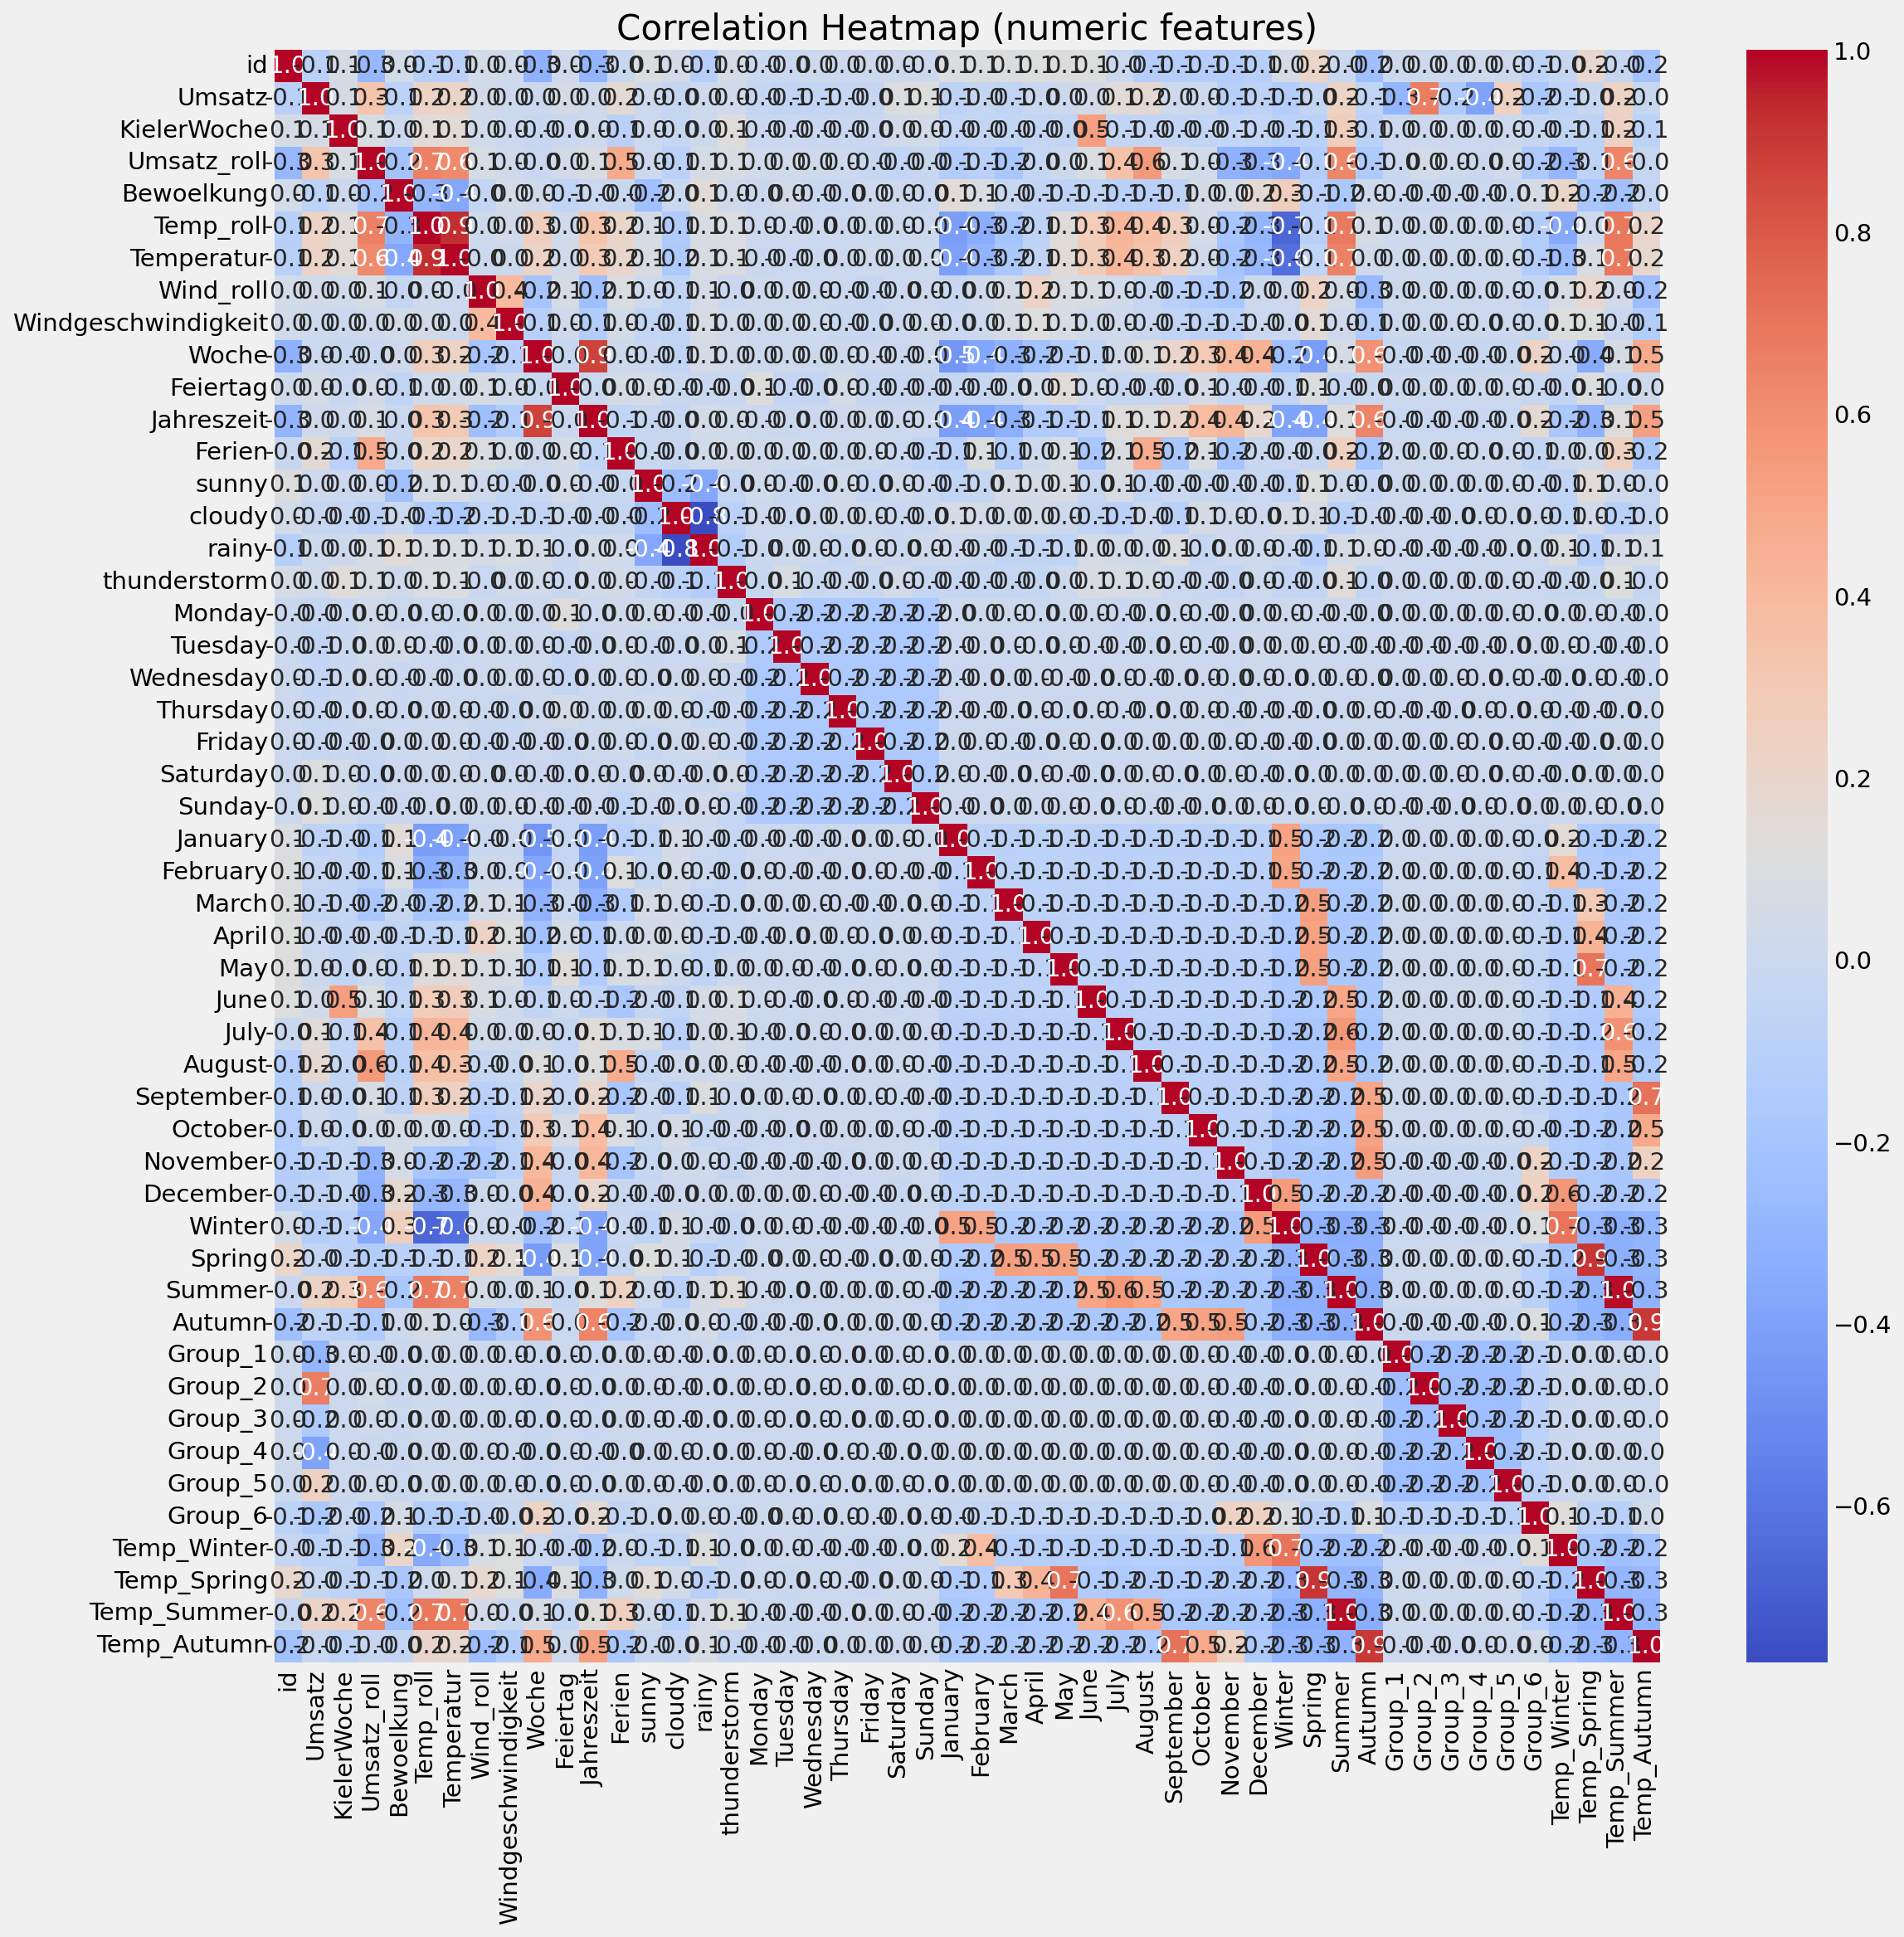

In [13]:
# Create a correlation heatmap with 2 decimal places

correlation_matrix = df_num_feature.corr()

plt.figure(figsize=(16,16))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='coolwarm')
plt.title("Correlation Heatmap (numeric features)")
plt.show()


So , with the current pre-processed data, our dependent variable (Target) , i.e. Umsatz (Revenue) has decent (more than 10%) correlation with 

- Temperature (~0.21)
- Wochentag (~0.13) 
- Ferien (~0.16) aka School Holiday


The following code snippet is similar to tasks done in *DeepLearningAI Course* reference materials

KeyError: "['Wochentag', 'Warengruppe'] not in index"

In [21]:
train_data = pd.read_csv("/workspaces/bakery_prediction/2_BaselineModel/split_rollingaverage_data/train_data.csv", encoding = "utf-8")
# create the model
#model = smf.ols('Umsatz ~ Temp_roll + Tuesday + Wednesday + Thursday + Friday + Saturday + Sunday + Ferien + Group_1 + Group_2 + Group_3 + Group_4 + Group_5 + Group_6', data=train_data).fit()
model2 = smf.ols('Umsatz ~ Temp_roll + Temp_Summer + Ferien + Group_2 + Group_3 + Group_4 + Group_5 + Group_6 + August + July + Sunday + Saturday', data=train_data).fit()
#try1 = smf.ols('Umsatz ~ Temperatur + Wochentag + Ferien + C(Warengruppe) + C(Monat) + C(Woche)', data=train_data).fit()
#try2 = smf.ols('Umsatz ~ C(Warengruppe) + KielerWoche + Bewoelkung  + C(Monat) + C(Wochentag) + Feiertag + C(Jahreszeit) + Ferien + sunny + cloudy + rainy + thunderstorm', data=train_data).fit()

# print the model summary
print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     1769.
Date:                Wed, 03 Dec 2025   Prob (F-statistic):               0.00
Time:                        16:33:20   Log-Likelihood:                -43025.
No. Observations:                7493   AIC:                         8.608e+04
Df Residuals:                    7480   BIC:                         8.617e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      57.1419      2.775     20.592      

# Prediction



In [22]:
# get the predictions for validation data
df_val = pd.read_csv("/workspaces/bakery_prediction/2_BaselineModel/split_rollingaverage_data/val_data.csv", encoding = "utf-8")
df_val['Datum'] = pd.to_datetime(df_val['Datum'], format='%Y-%m-%d')

predict = model2.predict(df_val)

# calculate the Mean absolute percentage error (MAPE)
mape = (abs((df_val['Umsatz'] - predict) / df_val['Umsatz'])).mean() * 100
print(f"Mean Absolute Percentage Error: {mape}%")

#for each warengruppe calculate the MAPE
gruppen_cols = ['Group_1', 'Group_2', 'Group_3', 'Group_4', 'Group_5', 'Group_6']

for col in gruppen_cols:
    df_warengruppe = df_val[df_val[col] == 1]

    predict = model2.predict(df_warengruppe)
    mape = ((abs(df_warengruppe['Umsatz'] - predict) / df_warengruppe['Umsatz'])).mean() * 100

    print(f"{col}: MAPE = {mape:.2f}%")


Mean Absolute Percentage Error: 33.15794715470899%
Group_1: MAPE = 38.71%
Group_2: MAPE = 28.11%
Group_3: MAPE = 24.13%
Group_4: MAPE = 49.99%
Group_5: MAPE = 19.36%
Group_6: MAPE = 68.21%


In [ ]:
df_test = pd.read_csv("/workspaces/bakery_prediction/2_BaselineModel/split_data/test_data.csv", encoding = "utf-8")
df_test['Datum'] = pd.to_datetime(df_test['Datum'], format='%Y-%m-%d')
predict_test = model2.predict(df_test)

#save predictions to csv just id and predicted umsatz
df_test['Predicted_Umsatz'] = predict_test
df_test[['id', 'Predicted_Umsatz']].to_csv("/workspaces/bakery_prediction/2_BaselineModel/prediction/try1?.csv", index=False)